11139


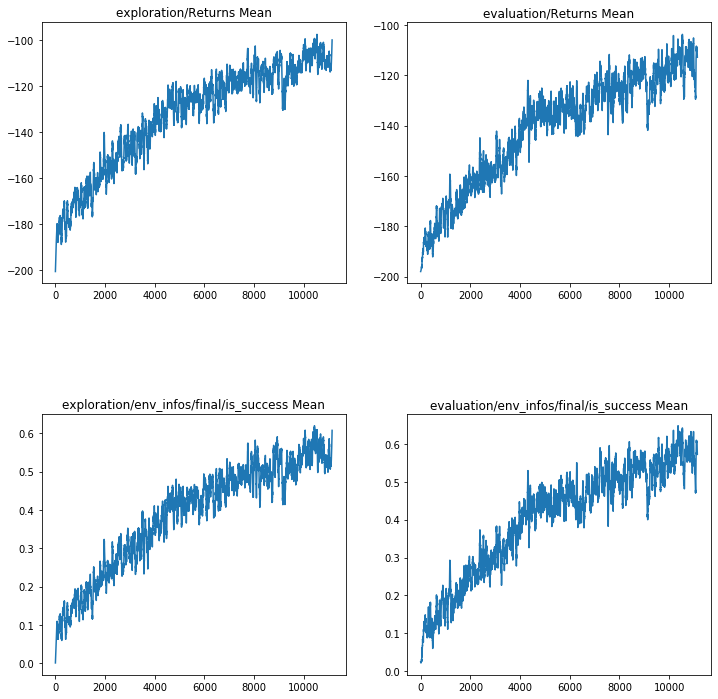

In [137]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
%matplotlib inline

dir_ = '/home/misha/research/rlkit/data'


file =  '/pointmass-HER-SAC-0/pointmass_HER-SAC_0_2019_07_16_13_12_53_0000--s-0/progress.csv'
file = '/pm-HER-SAC-VQVAE-jul16/pm_HER-SAC-VQVAE_jul16_2019_07_16_15_19_23_0000--s-0/progress.csv'
file = '/pm-HER-SAC-VQVAE-jul16/pm_HER-SAC-VQVAE_jul16_2019_07_16_20_15_11_0000--s-0/progress.csv'
#file = '/reacher-SAC-HER-sparse/reacher_SAC-HER_sparse_2019_07_17_17_09_00_0000--s-0/progress.csv'
#file ='/reacher-SAC-dense/reacher_SAC_dense_2019_07_17_14_04_20_0000--s-0/progress.csv'
#file = '/reacher-SAC-HER-VQVAE-0/reacher_SAC-HER-VQVAE_0_2019_07_17_19_13_00_0000--s-0/progress.csv'

""" golden reacher boy here """
file = '/reacher-no-target-SAC-HER-VQVAE-1/reacher_no_target_SAC-HER-VQVAE_1_2019_07_17_21_50_52_0000--s-0/progress.csv'
file2 = '/place-dense-real-LSAC-july31/place_dense_real_LSAC_july31_2019_07_31_15_51_34_0000--s-0/progress.csv'
file = '/place-sparse-real-LSAC-aug1/place_sparse_real_LSAC_aug1_2019_08_01_09_57_54_0000--s-0/progress.csv'

#file2 = '/place-sparse-real-HERSAC-aug2/place_sparse_real_HERSAC_aug2_2019_08_02_11_02_34_0000--s-0/progress.csv'
#file = '/pick-place-sparse-real-HERSAC-aug2/pick_place_sparse_real_HERSAC_aug2_2019_08_02_12_36_54_0000--s-0/progress.csv'

#file = '/pick-place-sparse-real-LSAC-aug1/pick_place_sparse_real_LSAC_aug1_2019_08_01_14_29_33_0000--s-0/progress.csv'
#file = '/pick-place-sparse-real-LSAC-aug1/pick_place_sparse_real_LSAC_aug1_2019_08_01_14_36_49_0000--s-0/progress.csv'
# latent 
file = '/place-sparse-latent-LSAC-aug1/place_sparse_latent_LSAC_aug1_2019_08_01_19_50_10_0000--s-0/progress.csv'

file = '/pick-and-place-sparse-latent-LSAC-aug3/pick_and_place_sparse_latent_LSAC_aug3_2019_08_03_11_19_59_0000--s-0/progress.csv'
#file = '/place-sparse-latent-LSAC-aug3/place_sparse_latent_LSAC_aug3_2019_08_03_11_09_27_0000--s-0/progress.csv'
#file = '/pick-and-place-sparse-latent-LSAC-aug4/pick_and_place_sparse_latent_LSAC_aug4_2019_08_04_14_41_38_0000--s-0/progress.csv'

file2 = '/pick-and-place-sparse-latent-LSAC-aug5/pick_and_place_sparse_latent_LSAC_aug5_2019_08_05_12_41_33_0000--s-0/progress.csv'
#df1 = pd.read_csv(dir_+file1)[:]
df2 = pd.read_csv(dir_+file2)[:]
#df3 = pd.read_csv(dir_+file3)[:]
df = pd.read_csv(dir_+file)[:]
sac_keys = [#'trainer/QF1 Loss',
            #'trainer/Policy Loss',
            'exploration/Returns Mean',
            'evaluation/Returns Mean',
            'exploration/env_infos/final/is_success Mean',
            'evaluation/env_infos/final/is_success Mean',
            #'trainer/Alpha',
            #'exploration/env_infos/final/rep_counts Mean',
            #'evaluation/env_infos/final/rep_counts Mean',
            #'exploration/env_infos/is_success Mean',
            #'evaluation/env_infos/is_success Mean',
            #'exploration/env_infos/final/magnet_active Mean',
            #'evaluation/env_infos/final/magnet_active Mean',
           ]

from scipy.signal import savgol_filter

def plot_results(dfs,smooth,*keys):
    n = len(keys)
    rows = n//2 if n%2==0 else n//2+1
    cols = 2
    
    plot_dim = str(rows)+str(cols)
    subplot_keys = [int(plot_dim+str(x)) for x in range(1,n+1)]
    
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(hspace=.5)

    
    for k1,k2 in zip(keys,subplot_keys):
        fig.add_subplot(k2)  
        ax = plt.subplot(str(k2))
        ax.set_title(k1)
        w = 77
        if smooth:
            if 'is_success' in k1:
                for df in dfs:
                    plt.plot(np.clip(savgol_filter(df[k1],w,2),0,1))

            elif 'Returns' in k1:
                for df in dfs:
                    plt.plot(np.clip(savgol_filter(df[k1],w,2),-500,0))
            else:
                for df in dfs:
                    plt.plot(savgol_filter(df[k1],w,2))
        else:
            if 'is_success' in k1:
                for df in dfs:
                    plt.plot(np.clip(df[k1],0,1))
            else:
                for df in dfs:
                    plt.plot(df[k1])
        
    plt.show()

print(len(df2))
plot_results([df2],True,*sac_keys)

In [127]:
from rlkit.torch.sac.policies import MakeDeterministic, TanhGaussianPolicy
from rlkit.envs.wrappers import NormalizedBoxEnv
import rlkit.torch.pytorch_util as ptu
from rlkit.envs.dm import DMGoalPointMassEnv


from rlkit.samplers.rollout_functions import multitask_rollout_visualizer,rollout_visualizer
from vqvae.envs.reacher import EasyReacher
from vqvae.envs.manipulator import EasyManipulator
from vqvae.envs.pointmass import EasyPointmass, EasyPointmassVQVAE,GoalPointmass,GoalPointmassVQVAE
from vqvae.envs.reacher import GoalReacher,GoalReacherVQVAE,GoalReacherNoTargetVQVAE
from vqvae.envs.pusher import EasyPusher,GoalPusher,GoalPusherNoTarget,GoalPusherNoTargetVQVAE
from vqvae.envs.utils import SimpleGoalEnv, LatentGoalEnv
from vqvae.envs.stacker import StackerGoalEnv, StackerLatentGoalEnv

file = '/vqvae-pointmass-SAC-cheat-mixed/vqvae_pointmass_SAC_cheat_mixed_2019_07_15_18_37_32_0000--s-0/progress.csv'

import pickle 

dir_ = '/home/misha/research/rlkit/data'

file = '/place-dense-real-LSAC-july31/place_dense_real_LSAC_july31_2019_07_31_15_51_34_0000--s-0/params.pkl'
file = '/pick-place-sparse-real-LSAC-aug1/pick_place_sparse_real_LSAC_aug1_2019_08_01_14_36_49_0000--s-0/progress.csv'
file = '/pick-place-sparse-real-LSAC-aug1/pick_place_sparse_real_LSAC_aug1_2019_08_01_14_36_49_0000--s-0/params.pkl'
file = '/place-sparse-latent-LSAC-aug1/place_sparse_latent_LSAC_aug1_2019_08_01_19_50_10_0000--s-0/params.pkl'
#file = '/place-sparse-real-HERSAC-aug2/place_sparse_real_HERSAC_aug2_2019_08_02_11_02_34_0000--s-0/params.pkl'
#file = '/pick-place-sparse-real-HERSAC-aug2/pick_place_sparse_real_HERSAC_aug2_2019http://qrithm.com/
fie = '/place-sparse-latent-LSAC-aug3/place_sparse_latent_LSAC_aug3_2019_08_03_11_09_27_0000--s-0/params.pkl'
#file = '/pick-place-sparse-latent-LSAC-aug2/pick_place_sparse_latent_LSAC_aug2_2019_08_02_19_58_40_0000--s-0/params.pkl'
#file = '/pick-and-place-sparse-latent-LSAC-aug4/pick_and_place_sparse_latent_LSAC_aug4_2019_08_04_14_41_38_0000--s-0/params.pkl'

file = '/pick-and-place-sparse-latent-LSAC-aug5/pick_and_place_sparse_latent_LSAC_aug5_2019_08_05_12_41_33_0000--s-0/params.pkl'

MODEL_PATH = '/home/misha/research/vqvae/results/vqvae_temporal_data_long_ne8nd2.pth'
MODEL_PATH = '/home/misha/research/vqvae/results/vqvae_data_reacher_no_target_jul17_ne8nd2.pth'
MODEL_PATH = '/home/misha/research/vqvae/results/vqvae_data_pusher_no_target_jul21_ne512nd2.pth'

import time

def run_policy(file,eval_env,goal_env=False,
               use_color=True,cherrypick=False,
               fixed_length=False,
               desired_goal_key=None,
               random_colors=False,
               observation_key='observation',
               render_kwargs=dict(
                            height=64,width=64,
                            camera_id=0
                        )):

    ptu.set_gpu_mode(True,0)

    
        
    with open(file,'rb') as f:
        params = pickle.load(f)



    if goal_env:
        obs_dim = eval_env.observation_space.spaces['observation'].low.size
        action_dim = eval_env.action_space.low.size
        goal_dim = eval_env.observation_space.spaces['desired_goal'].low.size
    else:
        obs_dim = eval_env.observation_space.low.size
        action_dim = eval_env.action_space.low.size

    policy = params['exploration/policy'] #.to(ptu.device)
    policy = policy.eval()
    policy = MakeDeterministic(policy)
    if goal_env:
        r = [-1]
        step = 0
        while 0 not in r or sum(r) == 0:
            step+=1
            start = time.time()
            if goal_env:
                path = multitask_rollout_visualizer(eval_env,
                        agent=policy,
                        max_path_length=eval_env.max_steps,
                        render=True,
                        render_kwargs=render_kwargs,
                        observation_key=observation_key,
                        desired_goal_key=desired_goal_key,
                        get_action_kwargs=None,
                        return_dict_obs=True,
                        random_colors=random_colors,
                        use_color=use_color,
                        fixed_length=fixed_length,
                                                   )
          
                r = path["rewards"]
               
             
            else:
                path = rollout_visualizer(eval_env,
                    agent=policy,
                    max_path_length=eval_env.max_steps,
                    render=True,
                    render_kwargs=dict(
                        height=480,width=480,
                        camera_id=0
                    ),
                    use_color=use_color)
                
    
                r = path["rewards"]
            print(step,len(r),sum(r),end='\r')
            if not cherrypick:
                break


    
    return path,eval_env

#env = GoalPusherNoTarget(maxf4#WLQ9J_steps=100,threshold=0.05)
#env = SimpleGoalEnv(obs_dim=42, goal_dim=3, env_name='stacker',reward_type='sparse',
#                             task='push_1', max_steps=100)

"""
env = StackerGoalEnv(obs_dim=30, goal_dim=3,
                              env_name='stacker',
                              task='pick_and_place',
                              max_steps=200,
                              reward_type='pick_and_place_sparse',
                              threshold=0.05)
"""
env = StackerLatentGoalEnv(obs_dim=128,
                            goal_dim=128,
                            env_name='stacker',
                            task='pick_and_place',
                            max_steps=200,
                            reward_type='pick_and_place_sparse',
                            threshold=0.08,
                            render_kwargs=dict(
                            width=64, height=64, camera_id=0),
                            gpu_id=0,
                            easy_reset=False)

path,env = run_policy(dir_+file,env,
                          goal_env=True,
                          use_color=True,
                          cherrypick=False,
                          fixed_length=True,
                          desired_goal_key='desired_goal',
                          observation_key='observation',
                          random_colors=False,
                          render_kwargs=dict(width=64,height=64
                                            ,camera_id=0
                                            )
                         )

r = path['rewards']

print(len(r),sum(r))
print('>'*10)
print(r[:3],r[-3:])
print(env.magnet_active)


200 [-200.]
>>>>>>>>>>
[[-1.]
 [-1.]
 [-1.]] [[-1.]
 [-1.]
 [-1.]]
False


In [128]:
if hasattr(env,'current_rep'):
    print(len(env.visited_reps))
    a = env.action_space.sample()
    obs,r,d,info = env.step(a)
    print(info)

In [129]:
from vqvae.envs.utils import _ts_to_obs
from vqvae.envs.pusher import *


In [130]:
import skvideo.io
import numpy as np
import cv2
print(env.magnet_active)
from PIL import Image, ImageDraw, ImageFont
 
def draw_text(img,text):
    img = Image.fromarray(img)
    fnt = ImageFont.truetype('/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf', 25)
    d = ImageDraw.Draw(img)
    d.text((20,20), text, font=fnt, fill=(255, 255, 255))
    return np.array(img)


    
def generate_goal_img(env,desired_goal,render_kwargs=dict(width=64,height=64,camera_id=0)):
    stationary_reset(env)
    #kwargs = dict(box0_x=desired_goal[0],arm_root=-1.6,arm_shoulder=-.5,arm_elbow=-1,arm_wrist=-1)
    #kwargs = dict(box0_x=desired_goal[0],arm_root=0,arm_shoulder=0,arm_elbow=0,arm_wrist=0)

    #set_pusher_qpos(env,**kwargs)
    print('desired goal is ',desired_goal)
    with env.physics.reset_context():
        env.physics.named.data.qpos["box0_x"] = desired_goal[0]
        env.physics.named.data.qpos["box0_z"] = desired_goal[2]
    return env.physics.render(**render_kwargs)

def list_to_vid(name,imgs,goal_image=None,desired_goal=None,rate=None,img_dim=480):
    n = img_dim#imgs[0].shape[0]
    goal_imgs = []
    if goal_image is not None:
        goal_image = cv2.resize(goal_image.reshape(64,64,3), (n,n), interpolation = cv2.INTER_AREA)
        goal_image = draw_text(goal_image,"Goal Image")
        goal_imgs = [goal_image for _ in range(30)]
        goal_imgs = [cv2.resize(img, (n,n), interpolation = cv2.INTER_AREA) for img in goal_imgs]
        imgs = goal_imgs + imgs

    if desired_goal is not None:
        goal_img = generate_goal_img(env,desired_goal,render_kwargs=dict(width=n,height=n,camera_id=0))
        #goal_image = cv2.resize(goal_image, (n,n), interpolation = cv2.INTER_AREA)
        goal_img = draw_text(goal_img,"Goal Image - Block Position")
        goal_imgs = [goal_img for pick_and_ in range(30)]
    
        imgs = goal_imgs + imgs
        

    imgs = [cv2.resize(img, (n,n), interpolation = cv2.INTER_AREA) for img in imgs]
    imgs = np.array(imgs)

    outputdata = imgs
    outputdata = outputdata.astype(np.uint8)
    outputdict={}
    outputdict["-pix_fmt"]='yuv420p'
    if rate is not None:
        outputdict["-r"]=rate
    skvideo.io.vwrite(name+".mp4",outputdata, outputdict=outputdict)

#list_to_vid('video',path["images"],goal_image=env.goal_img if hasattr(env,'goal_img') else None)
#list_to_vid('video',path["images"],gen_goal_image=True,desired_goal=path["observations"][0]["state_desired_goal"])
list_to_vid('video',path["images"],goal_image=env.goal_image,img_dim=480)


False


In [131]:
from vqvae import utils

#model_filename = 'vqvae_data_static_block_data_ne512_de64_1000.pth'
model_filename = '/home/misha/research/vqvae/results/vqvae_data_pusher_no_target_jul21_ne512nd2.pth'
model_filename=  '/home/misha/research/vqvae/results/vqvae_data_just_place_aug1_ne128nd2.pth'

model,vqvae_data = utils.load_model(model_filename,temporal=False)

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def reconstruct_path(imgs,model):
    x = imgs
    x = x.to(device)
    vq_encoder_output = model.pre_quantization_conv(model.encoder(x))
    _, z_q, _, _,e_indices = model.vector_quantization(vq_encoder_output)
    x_recon = model.decoder(z_q)

    return x,x_recon, z_q,e_indices

def numpy_to_tensor_img(img):
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).float().to(device)
    return img.permute(0, 3, 1, 2)

def normalize_image(img):
    """normalizes image to [-1,1] interval

    Arguments:
        img {np.array or torch.tensor} -- [an image array / tensor with integer values 0-255]
to
    Returns:
        [np.array or torch tensor] -- [an image array / tensor with float values in [-1,1] interval]
    """
    img = img.astype(float)
    # takes to [0,1] interval
    img /= 255.0
    # takes to [-0.5,0.5] interval
    img -= 0.5
    # takes to [-1,1] interval
    img /= 0.5
    return img
imgs = np.array(path["images"])
imgs = normalize_image(imgs)
imgs = numpy_to_tensor_img(imgs)
imgs_original,imgs,_,_ = reconstruct_path(imgs,model)
imgs = imgs.permute(0,2,3,1).detach().cpu().numpy()
imgs*=.5
imgs+=0.5
imgs*=255
imgs = imgs.astype(np.uint8)
list_to_vid('recon_video',imgs,goal_image=None)


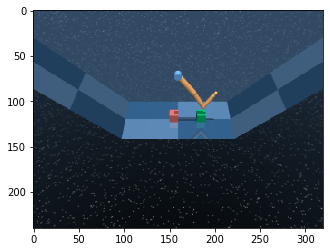

In [433]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dm_control import suite
env = suite.load('stacker','pick_and_place')

def set_magnet_state(dm_env, magnet_state=1):
        current_pos = dm_env.physics.named.data.qpos.copy()
        with dm_env.physics.reset_context():
            for i in range(len(current_pos)):
                dm_env.physics.named.data.qpos[i] = current_pos[i]
            dm_env.physics.named.model.eq_active[0] = magnet_state
            
env.reset()
set_magnet_state(env,0)
render_kwargs=dict(width=64,height=64,camera_id=0)
img = env.physics.render()
imgs = []
for _ in range(100):
    a = np.random.uniform(-1,1,env.action_spec().shape)
    env.step(a)
    img = env.physics.render()
    imgs.append(img)
    
list_to_vid('video',imgs,goal_image=None)

plt.imshow(img)

In [418]:
3%3

0

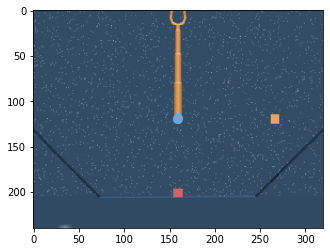

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dm_control import suite
env = suite.load('stacker','stack_1')

box_size = 0.022
delta = 2.1
bound = .38


def rand_a(spec):
    return np.random.uniform(spec.minimum ,spec.maximum , spec.shape)

def stationary_reset(env,n_steps=200):
    env.reset()
    spec = env.action_spec()
    for _ in range(n_steps):
        action = rand_a(spec)
        ts = env.step(action)
    return ts
        
        
def get_target(env):
    return get_xpos(env,name='target')

def get_xpos(env,name=None):
    with env.physics.reset_context():
        env.physics.named.data.geom_xpos[name]
    
def set_xpos(env,name='box0',x=None,y=None,z=None):
    if x is not None:
        env.physics.named.data.geom_xpos[name][0] = x
    if y is not None:
        env.physics.named.data.geom_xpos[name][1] = y
    if z is not None:
        env.physics.named.data.geom_xpos[name][2] = z
        
def set_obj_beside_target(env,name='box0',side='left'):
    
    # get target x y z coords
    target_pos = get_target(env)
    target_x, target_z = target_pos[0],target_pos[2]
    # make sure the bounds work
    # if not, set object side to be within bound
    
    if target_x > bound - delta*box_size:
        side='left'
    if target_x < -bound+delta*box_size:
        side='right'
    
    if side =='left':
        x = target_x - delta*box_size 
    elif side == 'right':
        x = target_x + delta*box_size
    else:
        raise ValueError('set side = left or right')
        
    set_xpos(env,name=name,x=x)    
    
def set_qpos(env,**kwargs):
    qpos = env.physics.data.qpos.copy()
    model = env.physics.model
    nq = model.nq
    with env.physics.reset_context():
        for i in range(nq):
            env.physics.data.qpos[i] = kwargs[str(i)] if str(i) in kwargs else qpos[i]
            
def set_stacker_qpos(env,**kwargs):
    id2name_list = ['arm_root','arm_shoulder','arm_elbow','arm_wrist','thumb',
                'thumbtip','finger','fingertip','box0_x','box0_z','box0_y']
    id2val = {str(id2name_list.index(k)):v for k,v in kwargs.items()}
    
    set_qpos(env,**id2val)
    
def set_box_in_gripper(env):
    hand_pos = get_xpos(env,name='hand')
    finger_pos  = get_xpos(env,name='fingertip1')
    thumb_pos  = get_xpos(env,name='thumbtip1')
    com_x = (finger_pos[0]+thumb_pos[0])/2.0
    com_z = (finger_pos[2]+thumb_pos[2])/2.0
    
    set_xpos(env,name='box0',x=com_x,z=com_z)

def fix_gripper(env):
    set_stacker_qpos(env,finger=.1,thumb=.1)


#set_xpos(env,x=.38)
#set_obj_beside_target(env,name='box0',side='right')
#set_griqpospper(env,finger=0)
fix_gripper(env)
render_kwargs={}
render_kwargs['camera_id']=0
x = env.physics.render(**render_kwargs)
plt.imshow(x)

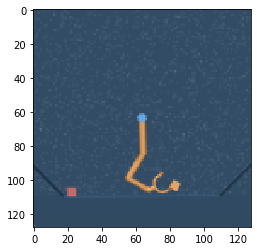

In [4]:
stationary_easy_reset(env)
#kwargs = dict(arm_root=-1.6,arm_shoulder=-.5,arm_elbow=-1,arm_wrist=-1)
#kwargs = dict(arm_root=1.6,arm_shoulder=.5,arm_elbow=1,arm_wrist=1)

#set_stacker_qpos(env,**kwargs)
#set_xpos(env,name='box0',x=.3)
#set_stacker_qpos(env,box0_x=-.37)

#action = np.array([0.,0.,0.,0.,0.])
#for _ in range(100):
#    env.step(action)

#print(env.physics.named.data.qpos)
x = env.physics.render(128,128,camera_id=0)
plt.imshow(x)

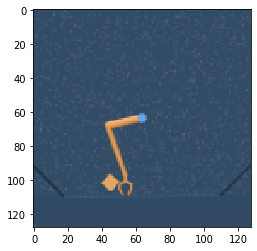

In [5]:
import numpy as np
import time
from dm_control import suite


def stationary_easy_reset(env,n_steps=10):
    # first put in easy position
    geom_xpos = env.physics.named.data.geom_xpos
    physics = env.physics
    data = env.physics.named.data
    
    start = time.time()
    
    while True:
        ts = env.reset()
        f1 = geom_xpos['fingertip1'][-1]
        f2 = geom_xpos['fingertip2'][-1]
        t1= geom_xpos['thumbtip1'][-1]
        t2= geom_xpos['thumbtip2'][-1]
        
        parts = dict(fingertip1=f1,fingertip2=f2,thumbtip1=t1,thumbtip2=t2)
        epsilons = [0.05 for _ in range(len(parts.values()))]
        if sum(np.less(list(parts.values()),epsilons)):
            obj = list(parts.keys())[np.random.randint(len(parts.keys()))]
            
            obj_pos = geom_xpos[obj][0]
            x = obj_pos + np.random.uniform(-.06,.06)
            data.qpos['box0_x'] = x
            data.qpos['box0_z'] = np.random.uniform(0.022,.07)
            physics.after_reset()
            penetrating = physics.data.ncon > 0
            if not penetrating:
                break
                
    end = time.time()
    #print(end-start)
                
 
    return ts, end-start


env = suite.load('stacker','push_1')


stationary_easy_reset(env)

x = env.physics.render(128,128,camera_id=0)
plt.imshow(x)

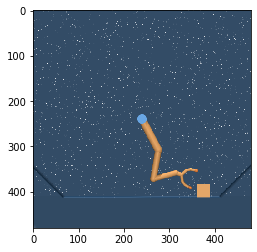

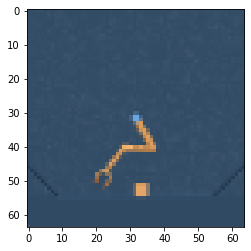

In [7]:
#set_stacker_qpos(env,thumb=.6,finger=.7)

#set_stacker_qpos(env,box0_z=15.)

#set_box_in_gripper(env)
#set_stacker_qpos(env,arm_root=2.,arm_shoulder=2.5,arm_elbow=-1.,arm_wrist=-.6)

d={}
d['camera_id']=0
d['width']=64
d['height']=64
x = env.physics.render(**d)
plt.imshow(x)

In [11]:
with env.physics.reset_context():
    for i in range(11):
        env.physics.named.data.qpos[i]=.1

OrderedDict([('arm_pos', array([[-0.69637277,  0.71768027],
       [-0.44648741, -0.89478991],
       [ 0.91908985, -0.39404802],
       [ 0.90953886,  0.41561889],
       [ 0.37787823,  0.9258553 ],
       [-0.05662518,  0.99839551],
       [ 0.37787823,  0.9258553 ],
       [ 0.15786792,  0.98746024]])), ('arm_vel', array([0., 0., 0., 0., 0., 0., 0., 0.])), ('touch', array([0., 0., 0., 0., 0.])), ('hand_pos', array([0.19937593, 0.3979041 , 0.98632899, 0.1647881 ])), ('box_pos', array([[ 0.25694194,  0.37803338, -0.42099005,  0.90706525]])), ('box_vel', array([0., 0., 0.])), ('target_pos', array([0.080309, 0.022   ]))])


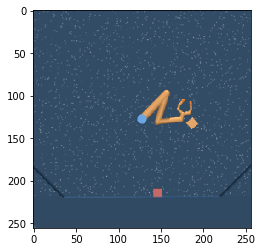

In [349]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from vqvae.envs.pusher import EasyPusher,GoalPusher
from dm_control import suite
env = suite.load('stacker','stack_1')#GoalPusher()

ts = env.reset()
print(ts.observation)
img = env.physics.render(256,256,0)

plt.imshow(img)

In [2]:
obs

{'observation': array([ 7.73387011e-01,  6.33934169e-01,  9.77778036e-01, -2.09642821e-01,
         9.81106820e-01,  1.93466812e-01,  9.80570541e-01,  1.96166803e-01,
        -1.64840518e-01,  9.86320234e-01, -6.06636007e-03,  9.99981599e-01,
        -1.28019284e-01,  9.91771679e-01, -7.93040708e-02,  9.96850472e-01,
         4.02588276e+00, -3.17370522e+00, -1.20941050e-01,  1.98360045e+00,
         5.97320205e-02,  4.99883919e-03,  4.92081800e-01,  8.05553197e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.13816372e-01,  3.06213980e-01, -9.07383134e-01,
        -4.20304471e-01,  2.11632426e-01,  2.19810195e-02, -7.07106781e-01,
         7.07106781e-01,  5.63347528e-15,  2.56157621e-13,  5.85836083e-16,
        -7.23187348e-02,  2.20000000e-02]),
 'state_observation': array([ 7.73387011e-01,  6.33934169e-01,  9.77778036e-01, -2.09642821e-01,
         9.81106820e-01,  1.93466812e-01,  9.80570541e-01,  1.96166803e-01,
        

In [3]:
obs_next,r,d,info = env.step(env.action_space.sample())
print(r,d,info)

-1.0 False {'is_success': False}


In [17]:
env.dm_env.physics.named.data.geom_xpos

FieldIndexer(geom_xpos):
                x         y         z         
 0      floor [ 0         0         0       ]
 1      wall1 [-0.683     0         0.283   ]
 2      wall2 [ 0.683     0         0.283   ]
 3 background [ 0         0.2       0.5     ]
 4   arm_root [ 0         0         0.4     ]
 5  upper_arm [ 0.0539    0         0.472   ]
 6 middle_arm [ 0.0646    0         0.606   ]
 7  lower_arm [-0.00853   0         0.615   ]
 8       hand [-0.0282    0         0.552   ]
 9      palm1 [-0.0237    0         0.525   ]
10      palm2 [-0.00188   0         0.546   ]
11     thumb1 [-0.0241    0         0.5     ]
12     thumb2 [-0.0105    0         0.484   ]
13  thumbtip1 [ 0.00364   0         0.475   ]
14  thumbtip2 [ 0.00835   0         0.471   ]
15    finger1 [ 0.0236    1.33e-18  0.545   ]
16    finger2 [ 0.0382    3.85e-18  0.53    ]
17 fingertip1 [ 0.047     5.89e-18  0.516   ]
18 fingertip2 [ 0.0501    6.6e-18   0.51    ]
19       box0 [ 0.257     0         0.022   ]
20     t

In [4]:
'floor' in env.physics.named.data.geom_xpos

/home/misha/miniconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


False